In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
img = Image.open('10/a1.jpg').convert('L')
img.size

(4624, 3472)

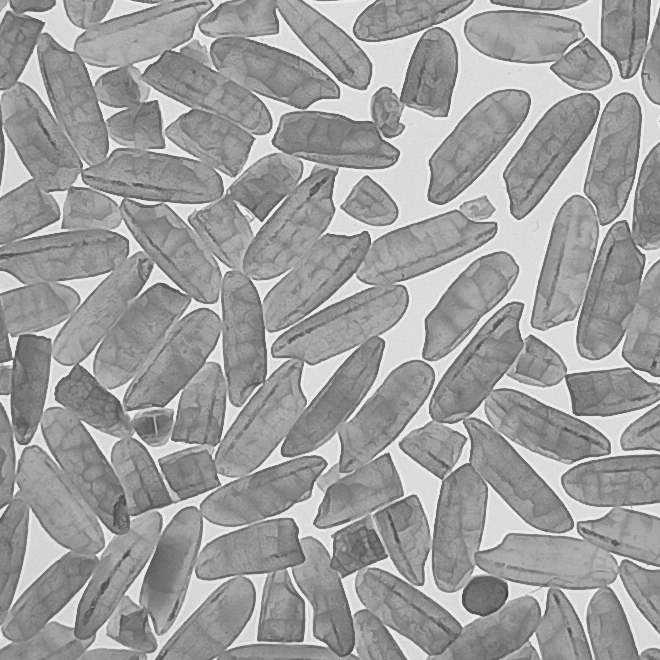

In [ ]:
w, h = (np.array(img.size) / 2).astype('int') + 2000
cw, ch = 660, 660
box = (w-cw)//2, (h-ch)//2, (w+cw)//2, (h+ch)//2

img_cropped = img.crop(box)
img_cropped

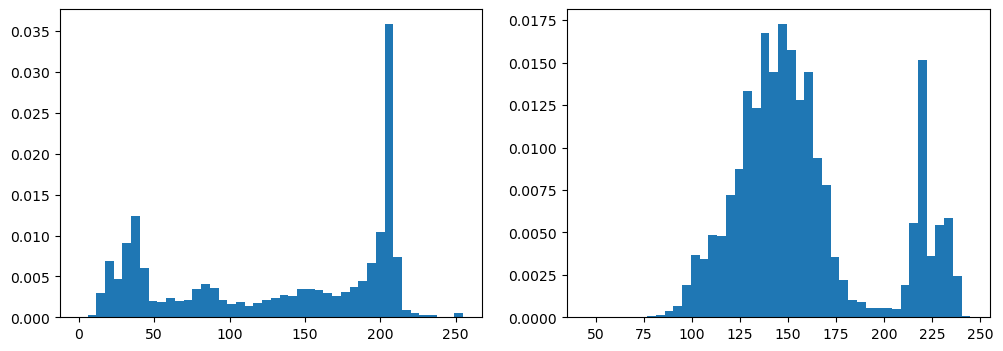

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(np.array(img).flatten(), bins=44, density=True);
plt.subplot(1,2,2)
plt.hist(np.array(img_cropped).flatten(), bins=44, density=True);

(4624, 3472)


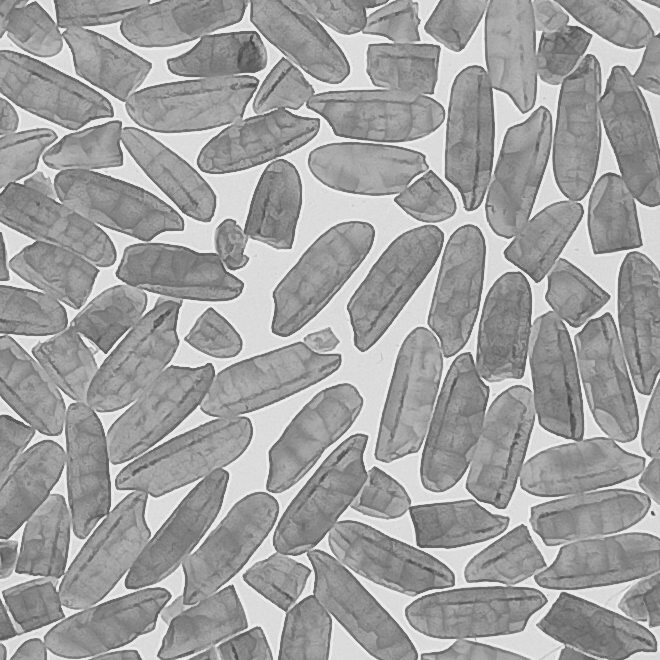

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to convert an image to grayscale and return the image and its histogram
def convert_to_grayscale(image_path):
    image = Image.open(image_path)
    grayscale_image = image.convert('L')
    histogram = np.array(grayscale_image.histogram())
    return grayscale_image, histogram

# Function to crop the image from the center and return the cropped image and its histogram
def crop_center(image):
    width, height = image.size
    new_width, new_height = 660, 660  # usar recrote de 660x660
    left = (width - new_width) // 2
    top = (height - new_height) // 2
    right = (width + new_width) // 2
    bottom = (height + new_height) // 2
    cropped_image = image.crop((left, top, right, bottom))
    cropped_histogram = np.array(cropped_image.histogram())
    return cropped_image, cropped_histogram

# 'image_path'
image_path = '10/a1.jpg'

# Convert to grayscale and get histogram
grayscale_image, grayscale_histogram = convert_to_grayscale(image_path)

# Crop the image from the center and get histogram
cropped_image, cropped_histogram = crop_center(grayscale_image)

print(grayscale_image.size)
cropped_image

Folder: 10 29
Folder: 11 31
Folder: 12 32
Folder: 13 35
Folder: 14 31
Folder: 15 31
Folder: 16 29


<BarContainer object of 7 artists>

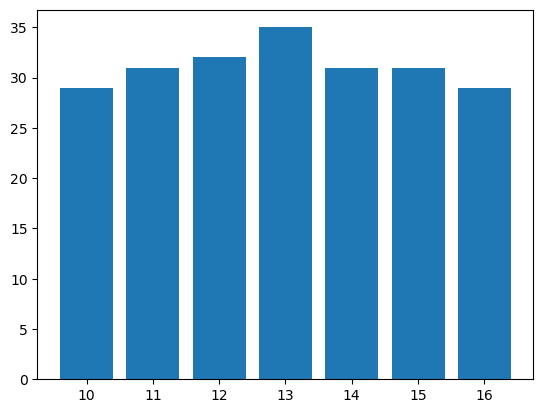

In [ ]:
import glob

n_imgs = []

for i in range(10,17):
    image_list = [f for f in glob.glob(str(i)+"/*.jpg")]
    print('Folder:', i, len(image_list))  # i is the label (humidity)
    n_imgs += [len(image_list)]

plt.bar(range(10,17), n_imgs)

In [ ]:
# Iterate over list of figures for humidity 10
# Crop images (use the function from Sampedro, 660x660)
# Also try the whole image (also Sampedro provided a function)
# Flatten images (use numpy arrays) and calculate the histogram
# Hist: bins 44
# ITERATE for all humidities see code in cell above
# Plot the heatmap of the dataframe
image_list = [f for f in glob.glob(str(10)+"/*.jpg")]  # humedad 10
len(image_list), image_list

(29,
 ['10\\a1.jpg',
  '10\\a10.jpg',
  '10\\a12.jpg',
  '10\\a13.jpg',
  '10\\a14.jpg',
  '10\\a15.jpg',
  '10\\a16.jpg',
  '10\\a17.jpg',
  '10\\a18.jpg',
  '10\\a19.jpg',
  '10\\a2.jpg',
  '10\\a20.jpg',
  '10\\a21.jpg',
  '10\\a22.jpg',
  '10\\a23.jpg',
  '10\\a24.jpg',
  '10\\a25.jpg',
  '10\\a26.jpg',
  '10\\a27.jpg',
  '10\\a28.jpg',
  '10\\a29.jpg',
  '10\\a3.jpg',
  '10\\a30.jpg',
  '10\\a4.jpg',
  '10\\a5.jpg',
  '10\\a6.jpg',
  '10\\a7.jpg',
  '10\\a8.jpg',
  '10\\a9.jpg'])

<Axes: >

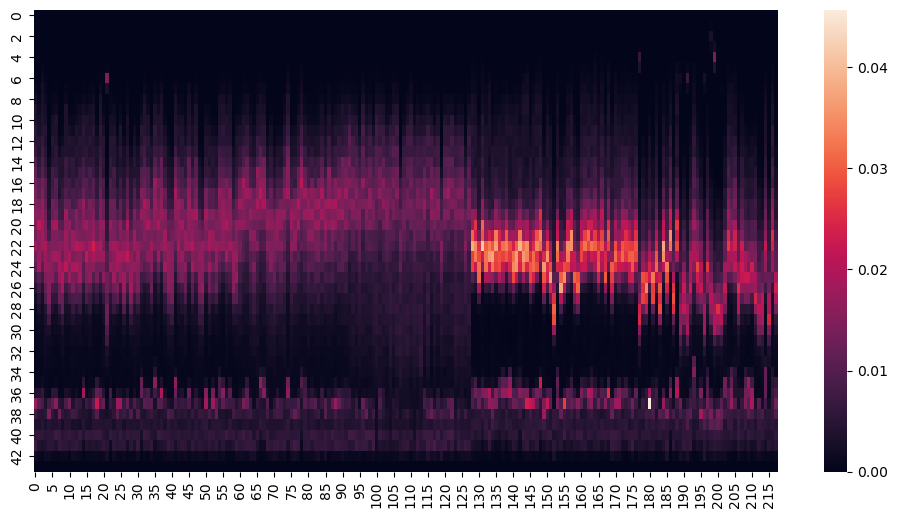

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(data.iloc[:,:-1].T)

In [ ]:
data['0']

0      3.367003e-06
1      4.861449e-06
2      2.308802e-06
3      2.195872e-06
4      4.469473e-07
           ...     
213    8.236875e-06
214    1.021450e-05
215    9.220839e-06
216    5.577245e-06
217    4.787209e-07
Name: 0, Length: 218, dtype: float64

In [ ]:
import pandas as pd
data = pd.DataFrame(np.array(hists), columns=[str(i) for i in range(44)])
data['humidity'] = np.array(y)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,humidity
0,3.367003e-06,1.290685e-05,2.805836e-05,5.443322e-05,1.105499e-04,0.000208,4.444444e-04,0.001093,0.002248,0.003570,0.003456,0.005094,0.004906,0.006184,0.009660,0.011285,0.012733,0.013969,0.015290,0.015792,0.015340,0.013660,0.018213,0.013091,0.010816,0.007233,0.004325,0.002295,0.001328,0.000903,0.000671,0.000560,0.000532,0.000676,0.000480,0.000799,0.003861,0.016976,0.007744,0.003855,0.005871,0.007032,0.001970,0.000072,10
1,4.861449e-06,1.026306e-05,1.404419e-05,2.646789e-05,1.026306e-04,0.000185,2.457732e-04,0.000432,0.001020,0.001679,0.002480,0.002922,0.004559,0.004001,0.005032,0.006529,0.010559,0.010711,0.013389,0.015502,0.021609,0.016603,0.015962,0.017328,0.018331,0.010163,0.007627,0.004709,0.003242,0.001741,0.001255,0.000890,0.000910,0.000604,0.000568,0.000716,0.004105,0.010099,0.004926,0.003533,0.006123,0.003787,0.000972,0.000087,10
2,2.308802e-06,1.212121e-05,6.810967e-05,1.385281e-04,2.372294e-04,0.000555,1.449351e-03,0.002519,0.002986,0.003300,0.003852,0.004350,0.006190,0.007406,0.009019,0.010560,0.012965,0.015138,0.017106,0.017633,0.017915,0.018470,0.017732,0.013865,0.010435,0.007564,0.004393,0.002577,0.001860,0.001540,0.001313,0.001115,0.000921,0.000772,0.000762,0.001676,0.005930,0.008263,0.004200,0.004907,0.005807,0.003263,0.000618,0.000044,10
3,2.195872e-06,4.391744e-06,1.646904e-05,2.744840e-05,7.356170e-05,0.000277,4.825428e-04,0.000811,0.001430,0.002277,0.003009,0.004474,0.003908,0.004755,0.005809,0.006974,0.010356,0.010022,0.011629,0.013178,0.013894,0.015213,0.019112,0.017371,0.017558,0.014473,0.011527,0.009313,0.004501,0.003193,0.002525,0.002059,0.001610,0.001460,0.000952,0.000875,0.001722,0.003431,0.005025,0.003094,0.004799,0.003863,0.001737,0.000310,10
4,4.469473e-07,4.469473e-07,8.938947e-07,8.938947e-07,1.340842e-06,0.000004,2.234737e-06,0.000005,0.000003,0.000009,0.000027,0.000068,0.000174,0.000374,0.001151,0.002574,0.003251,0.003817,0.003845,0.005260,0.006924,0.008592,0.014052,0.014903,0.016306,0.015609,0.015380,0.015322,0.011213,0.007303,0.003080,0.001620,0.001116,0.000915,0.000810,0.000662,0.001016,0.007736,0.014765,0.004537,0.005211,0.005220,0.001695,0.000129,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,8.236875e-06,1.430615e-05,6.719556e-05,8.453635e-05,3.077990e-05,0.000020,2.341007e-05,0.000023,0.000023,0.000036,0.000059,0.000055,0.000068,0.000134,0.000156,0.000448,0.001052,0.001429,0.001993,0.002473,0.004422,0.005162,0.006836,0.009705,0.010038,0.011021,0.014182,0.021591,0.020764,0.019749,0.013551,0.005570,0.003510,0.002747,0.001444,0.001072,0.001343,0.002670,0.008551,0.005619,0.005844,0.003905,0.001294,0.000055,16
214,1.021450e-05,2.213143e-05,2.042901e-05,4.539780e-05,9.817274e-05,0.000232,5.827942e-04,0.001228,0.002021,0.002403,0.002944,0.003340,0.003471,0.004083,0.005113,0.005606,0.007044,0.008630,0.010350,0.012185,0.013413,0.016382,0.022266,0.018134,0.016270,0.012036,0.007160,0.003518,0.001807,0.001033,0.000813,0.000696,0.000904,0.003317,0.011675,0.011547,0.011605,0.007945,0.004785,0.005086,0.004051,0.002413,0.000827,0.000077,16
215,9.220839e-06,7.963452e-06,2.472861e-05,5.825894e-05,6.580326e-05,0.000037,3.394945e-05,0.000006,0.000009,0.000005,0.000004,0.000005,0.000021,0.000039,0.000110,0.000249,0.000821,0.001590,0.002917,0.003091,0.004887,0.005364,0.005966,0.008274,0.008140,0.012015,0.012573,0.019417,0.019363,0.024275,0.014960,0.008423,0.003418,0.002321,0.001182,0.000945,0.000771,0.002310,0.005014,0.004464,0.003779,0.004660,0.000903,0.000045,16
216,5.577245e-06,1.549235e-05,5.639214e-05,1.016298e-04,3.253393e-04,0.000811,9.493710e-04,0.001808,0.002629,0.003258,0.003256,0.005388,0.005922,0.004733,0.007457,0.009044,0.007531,0.012434,0.015075,0.018635,0.017548,0.025407,0.024033,0.016355,0.017068,0.010446,0.006040,0.00290

In [ ]:
hists = []
y = []
for i in range(10,17):  # this are the folders (number/name)
    image_list = [f for f in glob.glob(str(i)+"/*.jpg")]
    y += [i]*len(image_list)
    for image_path in image_list:
        grayscale_image = convert_to_grayscale(image_path)[0]
        cropped_image = crop_center(grayscale_image)[0]
        hists += [np.histogram(cropped_image, density=True, bins=44)[0]]

np.array(hists).shape, np.array(y)

((218, 44),
 array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14,
        14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
        14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]))

In [ ]:
len(y)

218

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>